# SmartInternz Externship Program - Applied Data Science - Assignment 2

### Name: Sanskriti Sanjay Kumar Singh <br> Reg No: 20BCE1415 <br> Email: sanskriti.sanjaykumar2020@&#65279;vitstudent.ac.in <br> Campus: VIT Chennai

In [1]:
# Importing the necessary packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## Loading the Dataset

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
# Displaying the first 5 records of the dataset
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Displaying the shape of the dataset i.e. (no. of records, no. of attributes)
df.shape

(891, 15)

In [5]:
# Displaying information about the dataset attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [6]:
# Displaying the column labels of the dataset
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

## Univariate Analysis

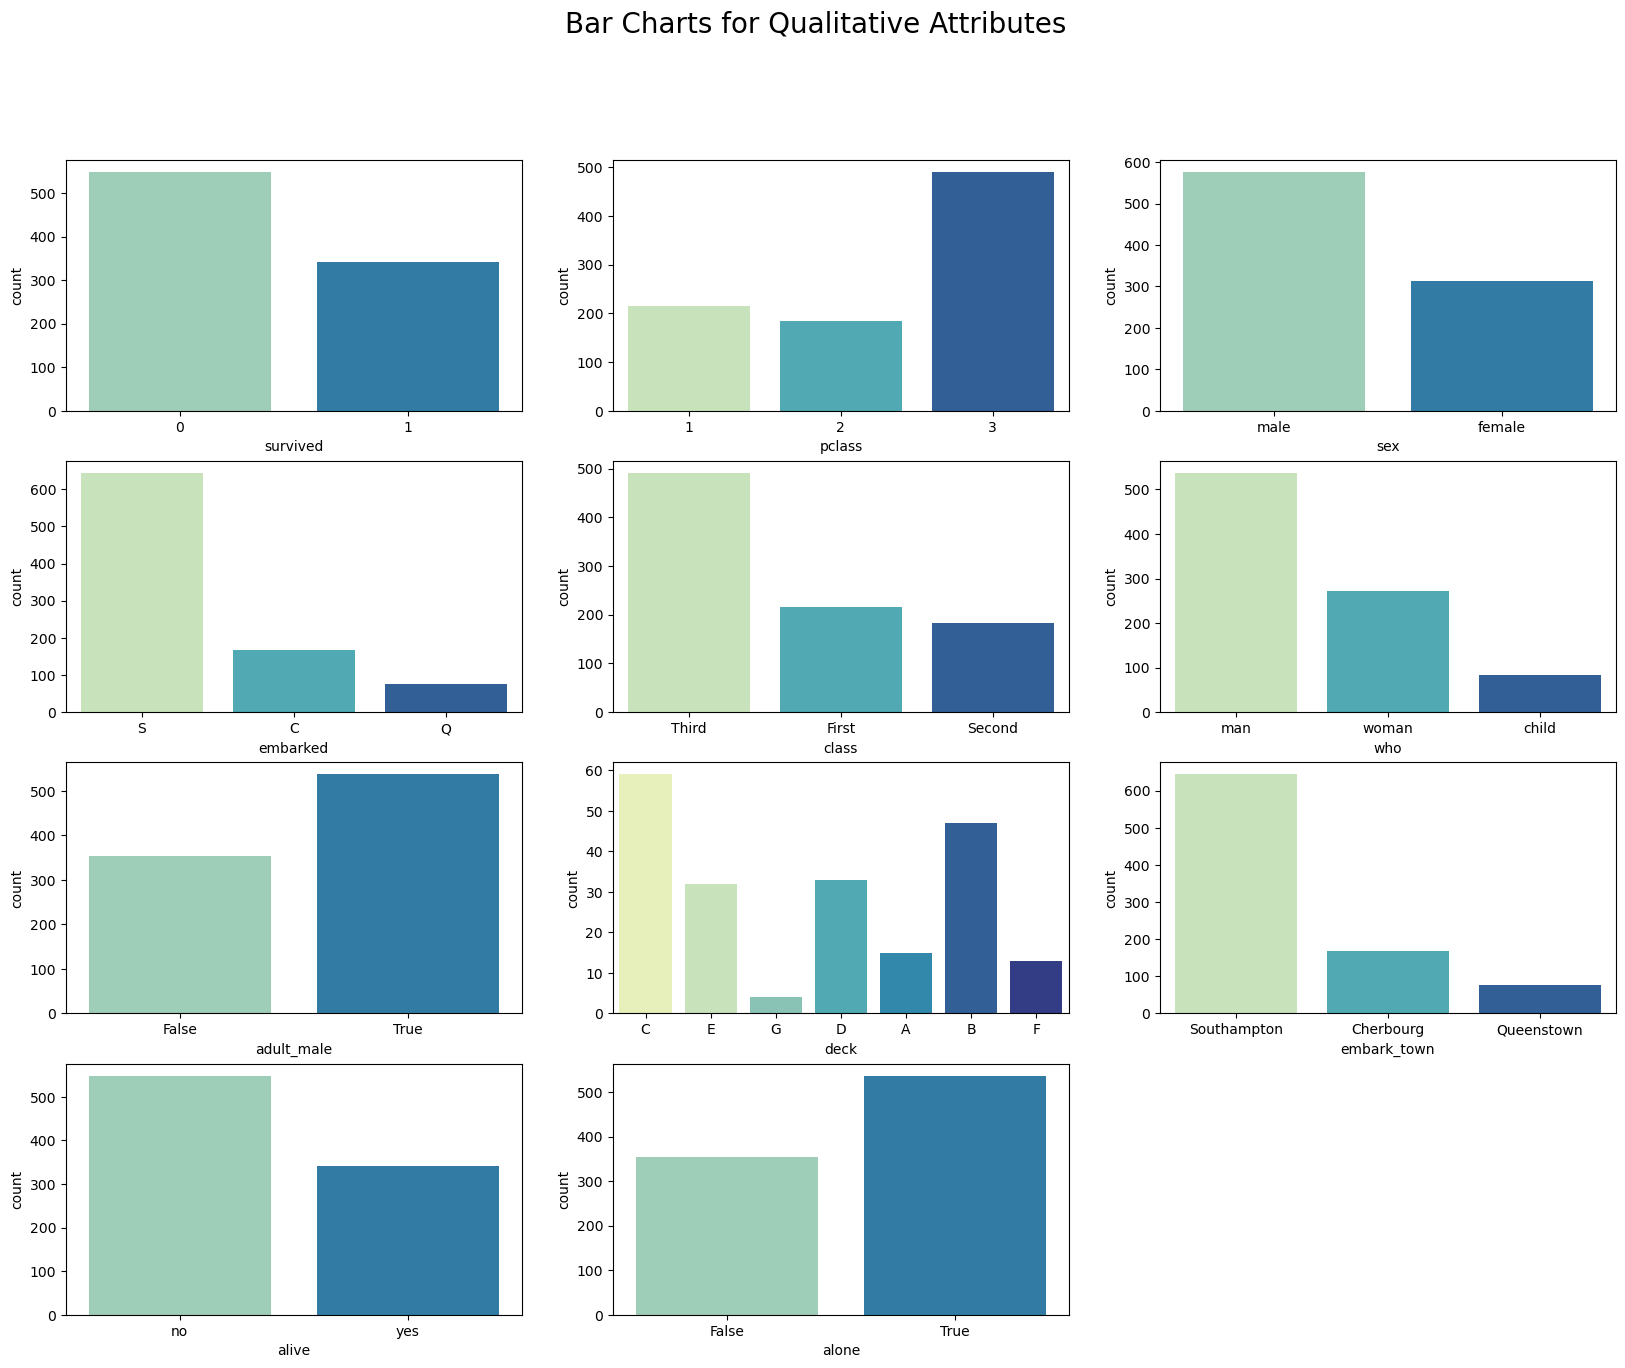

In [7]:
# Qualitative Variables (Ordinal & Nominal): survived, pclass, sex, embarked, class, who, adult_male, deck, embark_town, alive, alone
fig,ax = plt.subplots(4,3,figsize=(20, 15))
fig.suptitle('Bar Charts for Qualitative Attributes', fontsize = 20)

sns.countplot(ax = ax[0,0], x = 'survived', data = df, palette = 'YlGnBu')
sns.countplot(ax = ax[0,1], x = 'pclass', data = df, palette = 'YlGnBu')
sns.countplot(ax = ax[0,2], x = 'sex', data = df, palette = 'YlGnBu')

sns.countplot(ax = ax[1,0], x = 'embarked', data = df, palette = 'YlGnBu')
sns.countplot(ax = ax[1,1], x = 'class', data = df, palette = 'YlGnBu')
sns.countplot(ax = ax[1,2], x = 'who', data = df, palette = 'YlGnBu')

sns.countplot(ax = ax[2,0], x = 'adult_male', data = df, palette = 'YlGnBu')
sns.countplot(ax = ax[2,1], x = 'deck', data = df, palette = 'YlGnBu')
sns.countplot(ax = ax[2,2], x = 'embark_town', data = df, palette = 'YlGnBu')

sns.countplot(ax = ax[3,0], x = 'alive', data = df, palette = 'YlGnBu')
sns.countplot(ax = ax[3,1], x = 'alone', data = df, palette = 'YlGnBu')

fig.delaxes(ax[3,2])

<AxesSubplot:xlabel='parch', ylabel='count'>

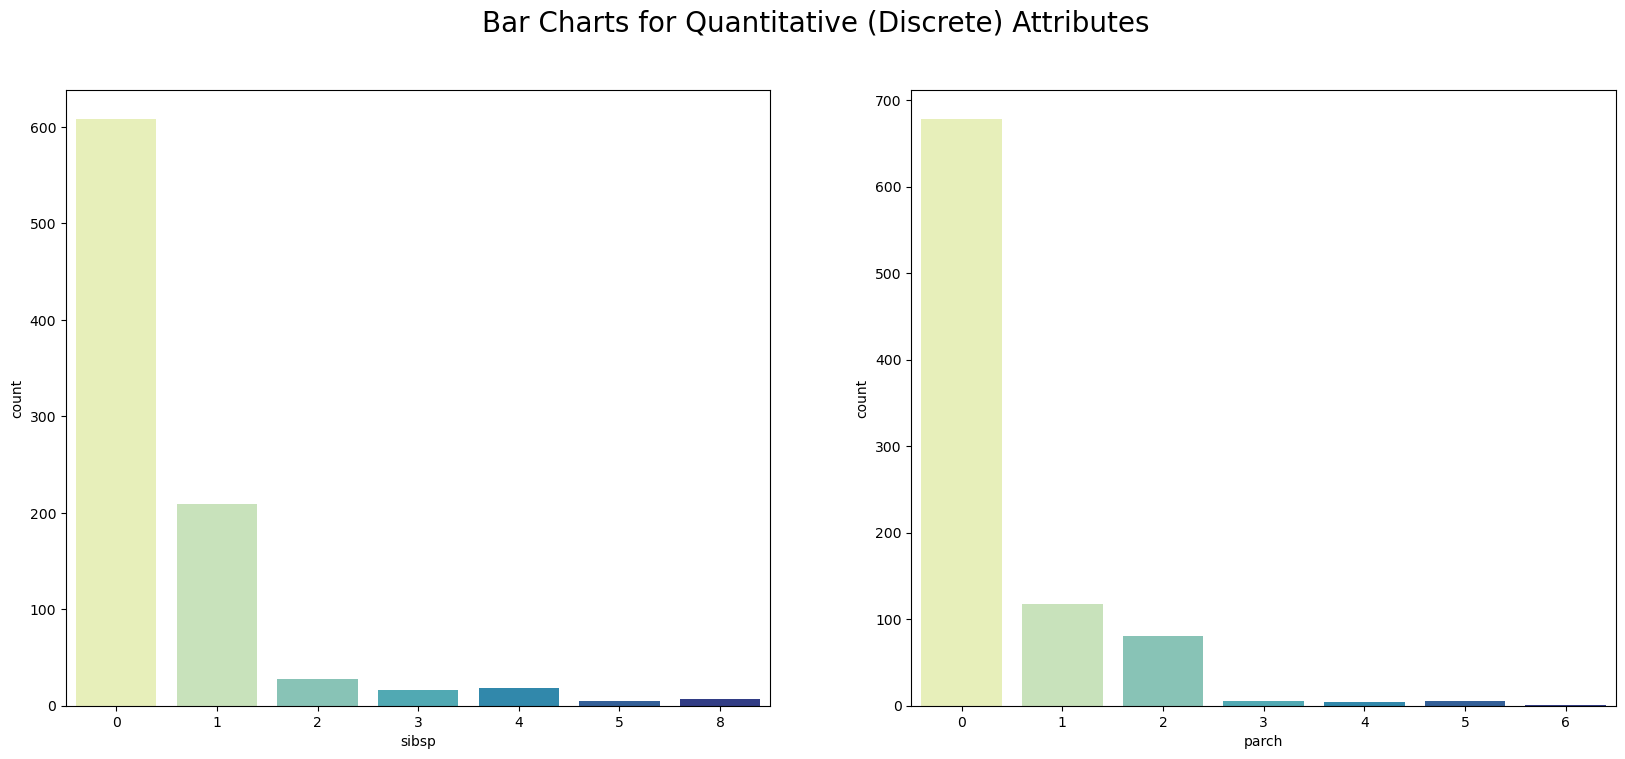

In [8]:
# Quantitative (Discrete) Variables: sibsp, parch
fig,ax = plt.subplots(1,2,figsize=(20, 8))
fig.suptitle('Bar Charts for Quantitative (Discrete) Attributes', fontsize = 20)

sns.countplot(ax = ax[0], x = 'sibsp', data = df, palette = 'YlGnBu')
sns.countplot(ax = ax[1], x = 'parch', data = df, palette = 'YlGnBu')

<AxesSubplot:xlabel='fare', ylabel='Count'>

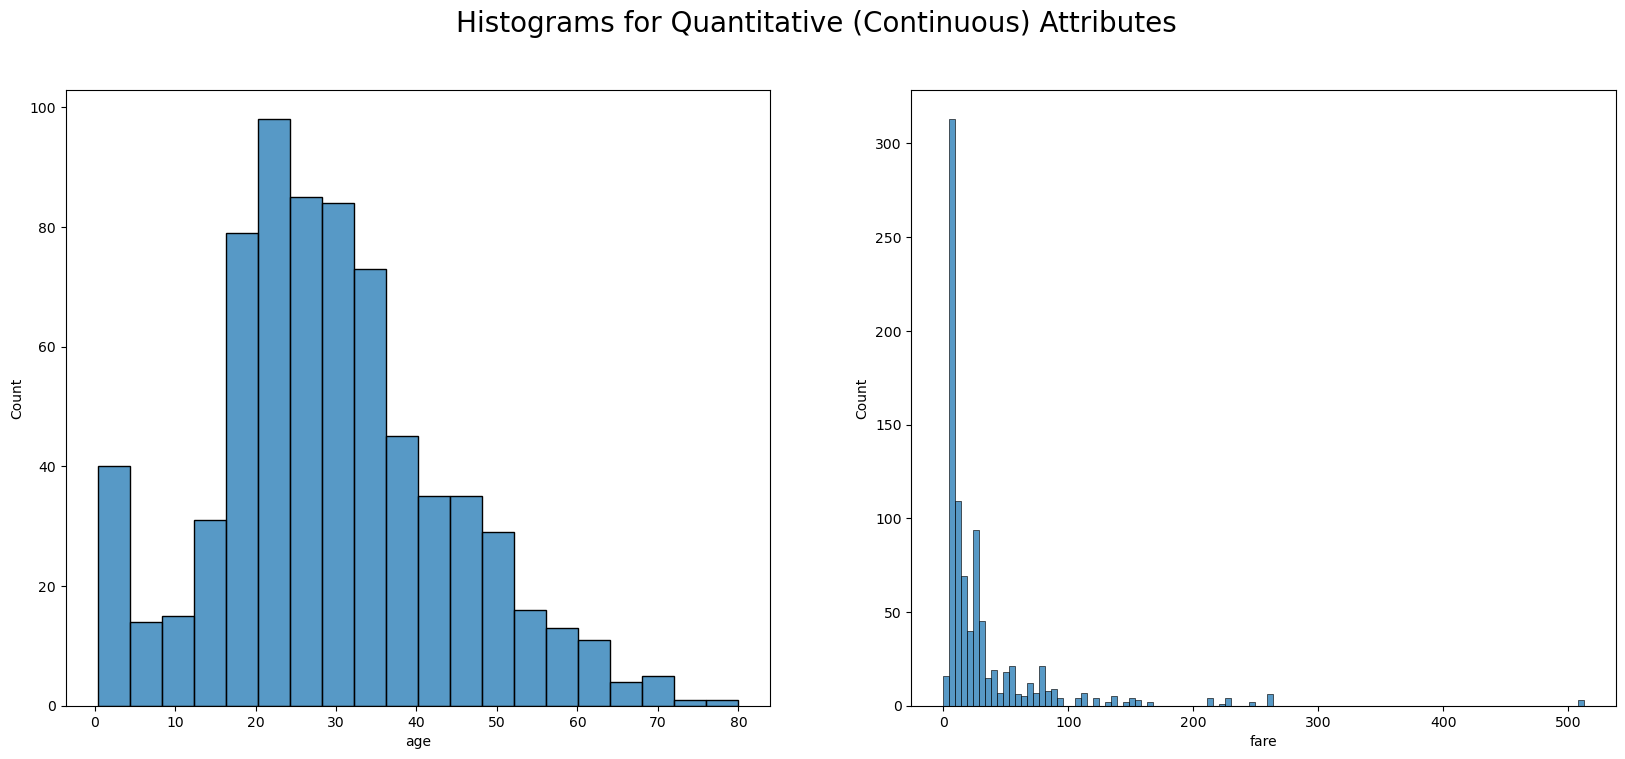

In [9]:
# Quantitative (Continuous) Variables: age, fare
fig,ax = plt.subplots(1,2,figsize=(20, 8))
fig.suptitle('Histograms for Quantitative (Continuous) Attributes', fontsize = 20)

sns.histplot(ax = ax[0], x = 'age', data = df, palette = 'YlGnBu')
sns.histplot(ax = ax[1], x = 'fare', data = df, palette = 'YlGnBu')

<AxesSubplot:xlabel='fare'>

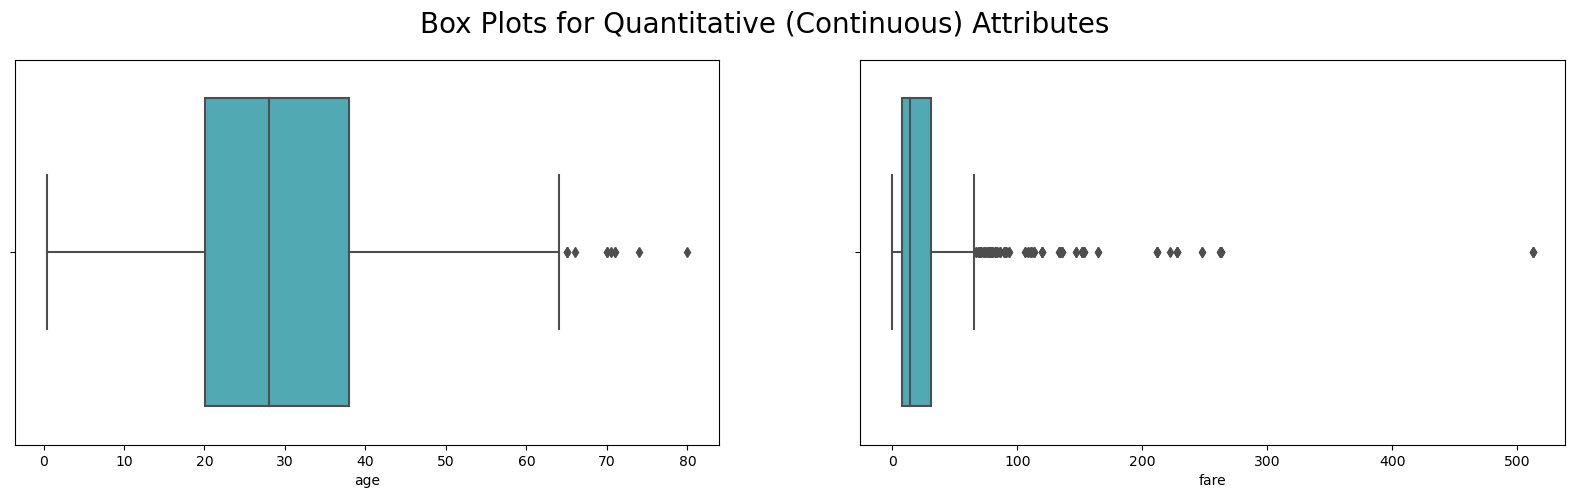

In [10]:
fig,ax = plt.subplots(1,2,figsize=(20, 5))
fig.suptitle('Box Plots for Quantitative (Continuous) Attributes', fontsize = 20)

sns.boxplot(ax = ax[0], x = 'age', data = df, palette = 'YlGnBu')
sns.boxplot(ax = ax[1], x = 'fare', data = df, palette = 'YlGnBu')

## Bi-variate Analysis

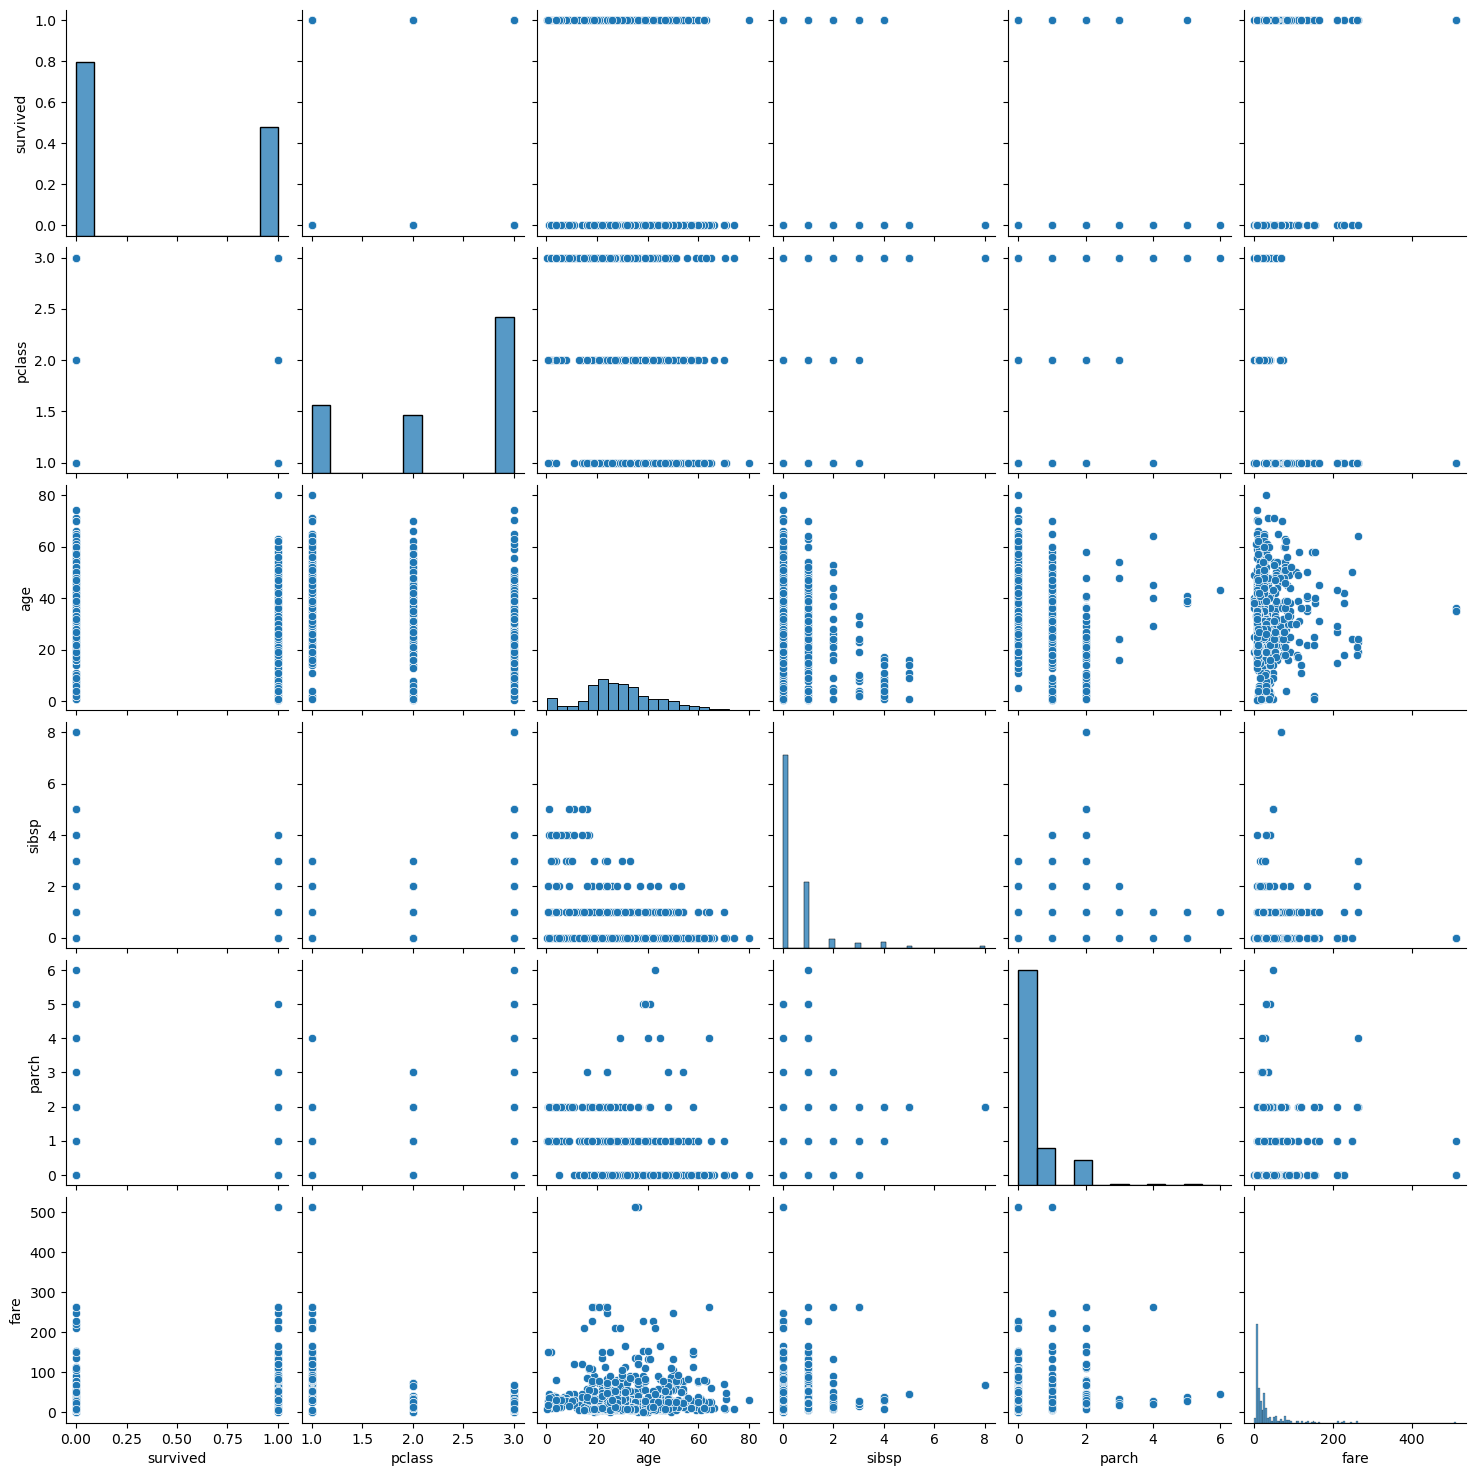

In [11]:
# Scatter Plots showing the relationship between the numerical attributes of the dataset
num_df = df.select_dtypes(exclude = ['object','bool'])
sns.pairplot(data = num_df, dropna = True, palette = 'YlGnBu')

<AxesSubplot:>

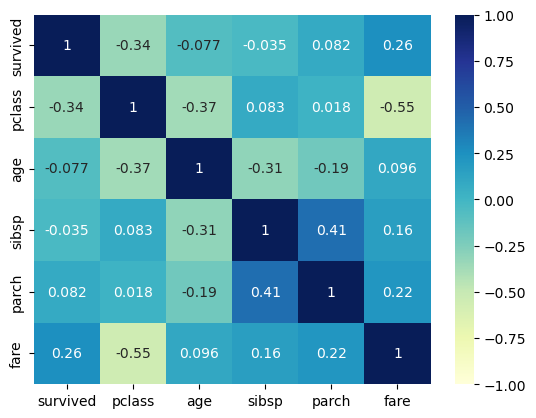

In [12]:
# Heatmap to find the correlation between the numerical attributes present in the dataset
sns.heatmap(num_df.corr(), annot = True, cmap = 'YlGnBu', vmin = -1, vmax = 1)

<AxesSubplot:xlabel='age', ylabel='Count'>

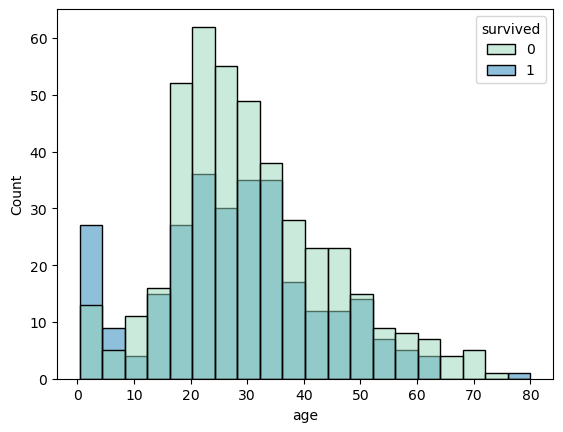

In [13]:
# Histogram of age showing colour-wise distribution according to survived
sns.histplot(x = 'age', data = df, palette = 'YlGnBu', hue = 'survived')

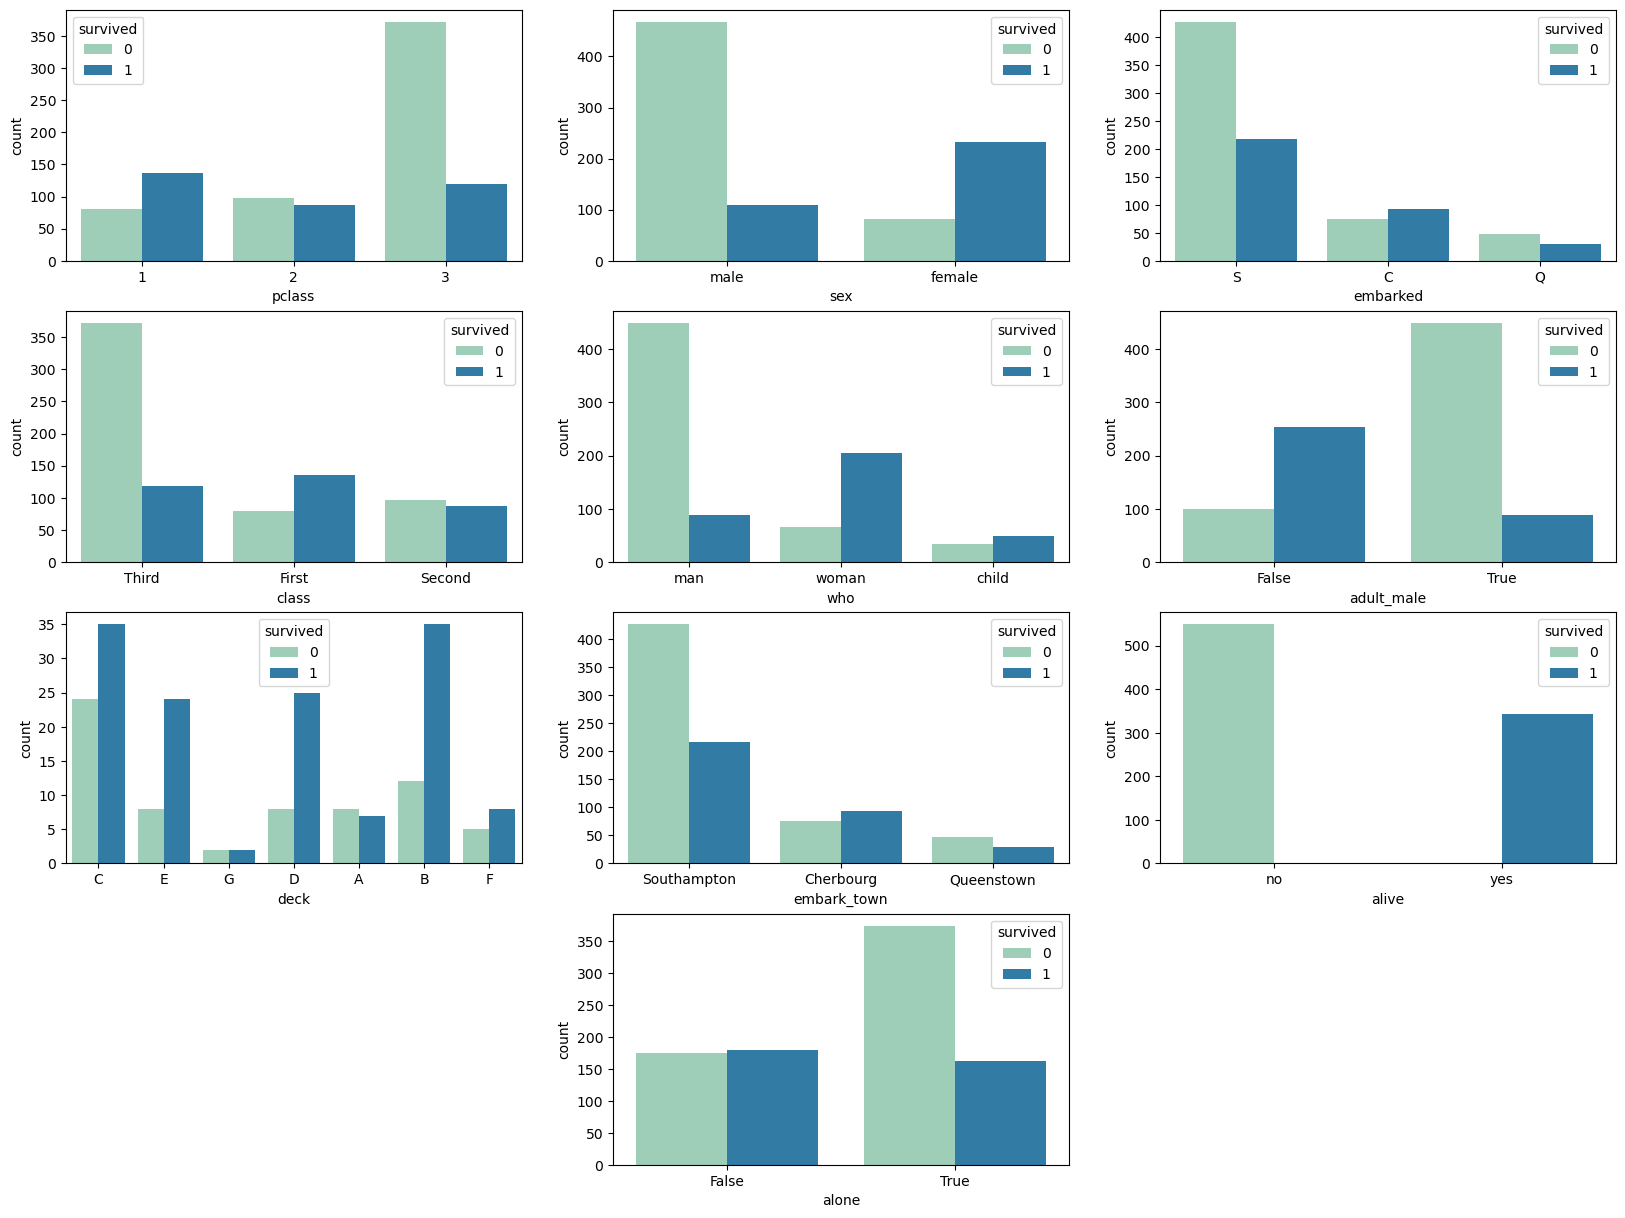

In [14]:
# Bar Chart for Qualitative Attributes showing the count group-wise according to survived
fig,ax = plt.subplots(4,3,figsize=(20, 15))

sns.countplot(ax = ax[0,0], x = 'pclass', hue = 'survived', data = df, palette = 'YlGnBu')
sns.countplot(ax = ax[0,1], x = 'sex', hue = 'survived', data = df, palette = 'YlGnBu')
sns.countplot(ax = ax[0,2], x = 'embarked', hue = 'survived', data = df, palette = 'YlGnBu')

sns.countplot(ax = ax[1,0], x = 'class', hue = 'survived', data = df, palette = 'YlGnBu')
sns.countplot(ax = ax[1,1], x = 'who', hue = 'survived', data = df, palette = 'YlGnBu')
sns.countplot(ax = ax[1,2], x = 'adult_male', hue = 'survived', data = df, palette = 'YlGnBu')

sns.countplot(ax = ax[2,0], x = 'deck', hue = 'survived', data = df, palette = 'YlGnBu')
sns.countplot(ax = ax[2,1], x = 'embark_town', hue = 'survived', data = df, palette = 'YlGnBu')
sns.countplot(ax = ax[2,2], x = 'alive', hue = 'survived', data = df, palette = 'YlGnBu')

fig.delaxes(ax[3,0])
sns.countplot(ax = ax[3,1], x = 'alone', hue = 'survived', data = df, palette = 'YlGnBu')
fig.delaxes(ax[3,2])

## Multivariate Analysis

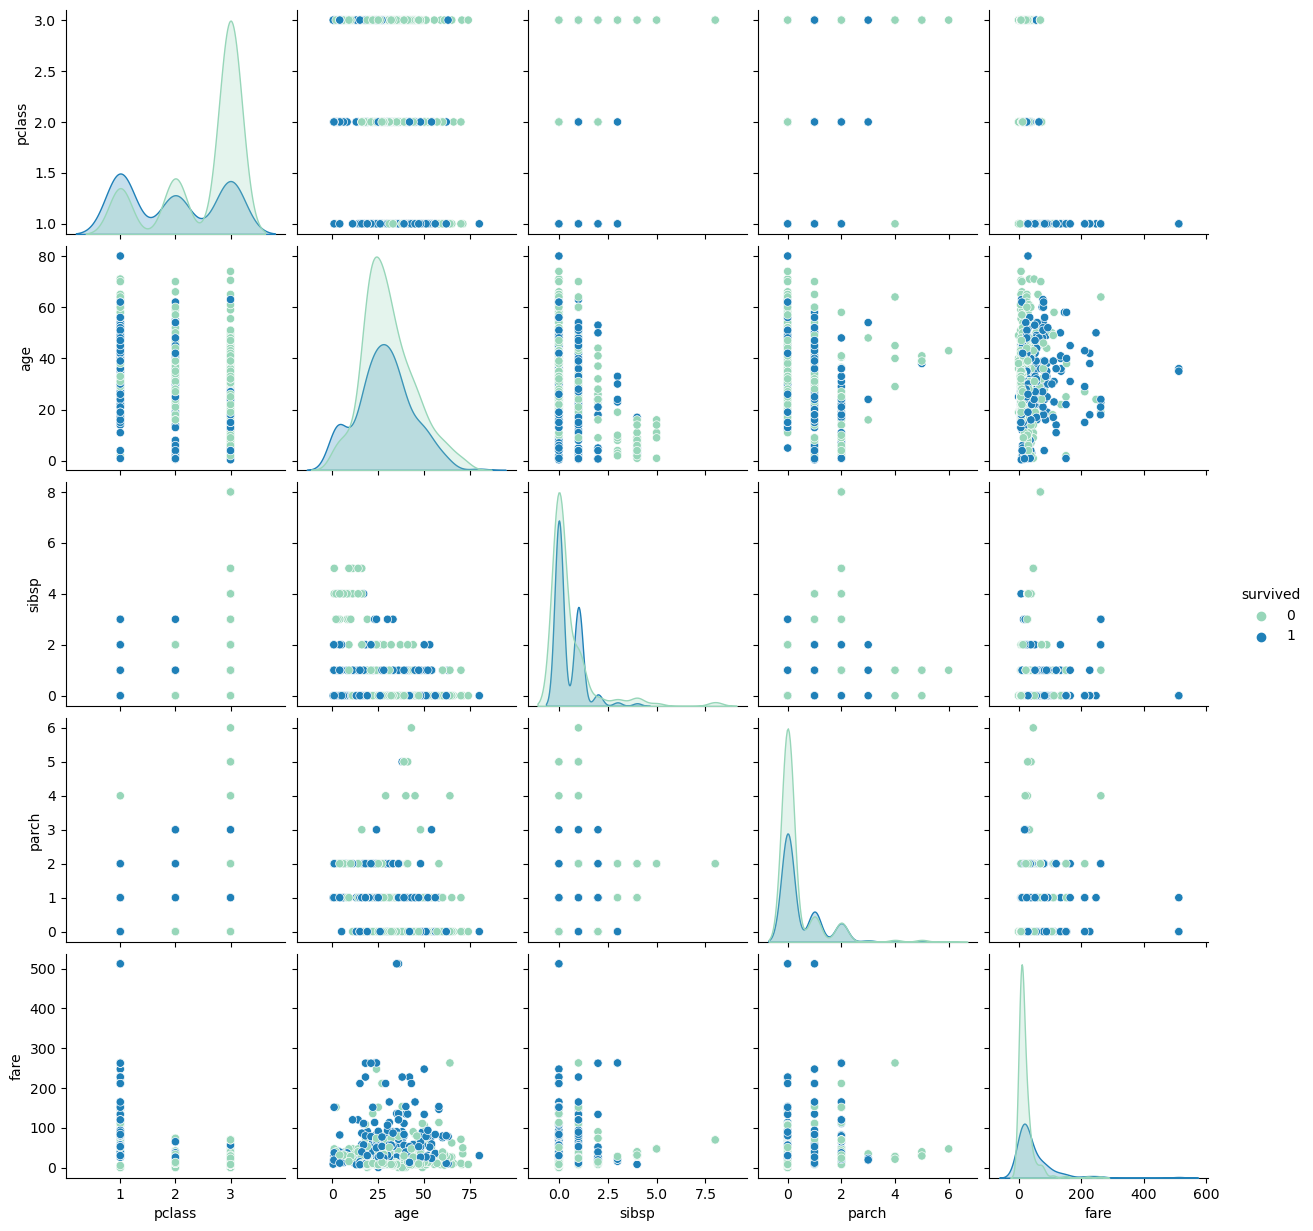

In [15]:
# Scatter Plots and Distribution plots between the numerical attributes of the dataset - colorcoded according to the attribute 'survived'
sns.pairplot(data = num_df, hue = 'survived', dropna = True, palette = 'YlGnBu')

## Descriptive Statistics

In [16]:
# Generating the Descriptive Statistics for the numerical attributes of the dataset
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# Checking for null values
df.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

<AxesSubplot:>

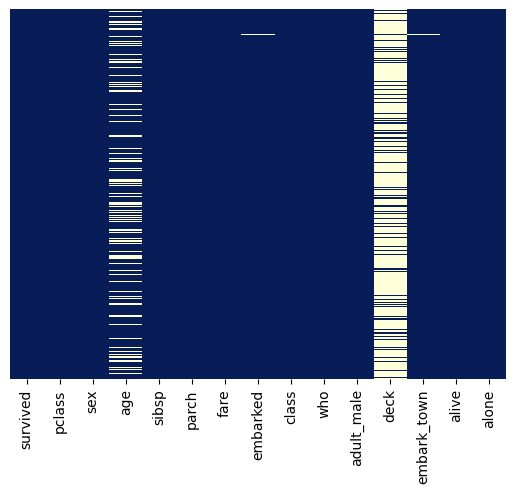

In [18]:
# Visualizing the count of missing values present in the dataset
sns.heatmap(df.isna(), yticklabels = False, cbar = False, cmap = "YlGnBu_r")

In [19]:
# Count of the number of missing values for each attribute
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## Handling the Missing Values

In [20]:
# Since the attribute 'age' is a numerical attribute, we are going to be imputing the missing values with the mean
df['age'].fillna(df['age'].mean(), inplace = True)

In [21]:
# Since the attributes 'embarked', 'embark_town' and 'deck' are categorical attributes, we are going to be imputing the missing values with the mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace = True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace = True)
df['deck'].fillna(df['deck'].mode()[0], inplace = True)

In [22]:
# Checking if the missing values have been imputed successfully
df.isnull().any()

survived       False
pclass         False
sex            False
age            False
sibsp          False
parch          False
fare           False
embarked       False
class          False
who            False
adult_male     False
deck           False
embark_town    False
alive          False
alone          False
dtype: bool

## Finding and Replacing the Outliers

<AxesSubplot:xlabel='fare'>

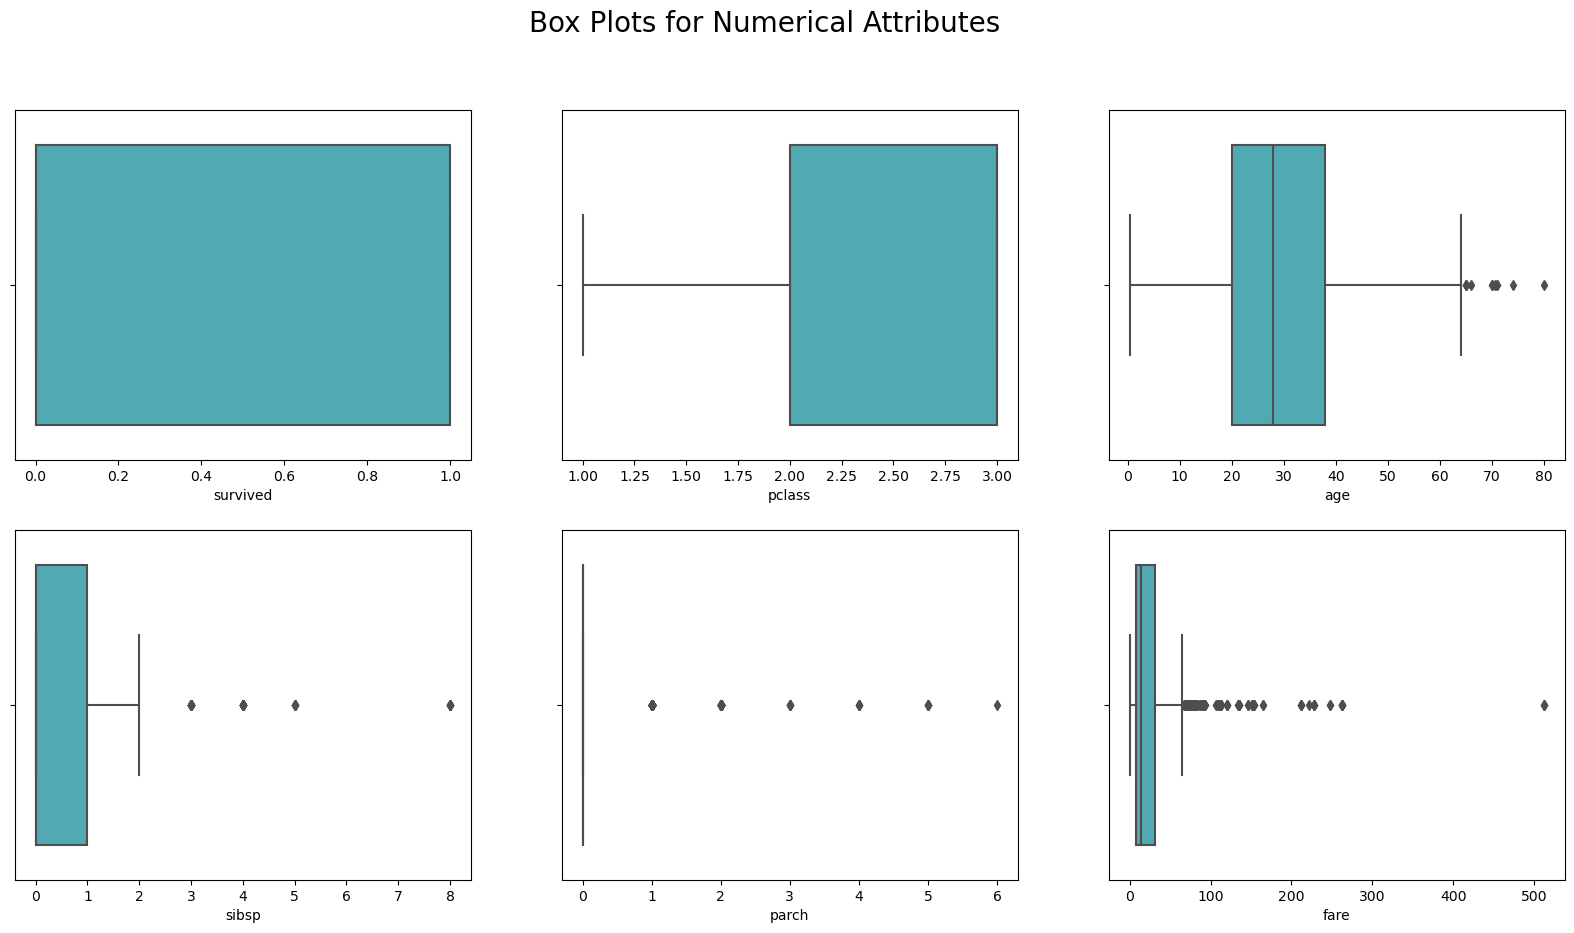

In [23]:
# Using Boxplots to visualize outliers
fig,ax = plt.subplots(2,3,figsize=(20, 10))
fig.suptitle('Box Plots for Numerical Attributes', fontsize = 20)

sns.boxplot(ax = ax[0,0], x = 'survived', data = num_df, palette = 'YlGnBu')
sns.boxplot(ax = ax[0,1], x = 'pclass', data = num_df, palette = 'YlGnBu')
sns.boxplot(ax = ax[0,2], x = 'age', data = num_df, palette = 'YlGnBu')

sns.boxplot(ax = ax[1,0], x = 'sibsp', data = num_df, palette = 'YlGnBu')
sns.boxplot(ax = ax[1,1], x = 'parch', data = num_df, palette = 'YlGnBu')
sns.boxplot(ax = ax[1,2], x = 'fare', data = num_df, palette = 'YlGnBu')

In [24]:
# Detecting and Handling Outliers of the attribute 'fare' by Flooring and Capping Technique   
Q1 = np.percentile(df['fare'],25)
Q3 = np.percentile(df['fare'],75)
IQR = Q3 - Q1
outlier_step = IQR * 1.5
df['fare'] = np.where(df['fare'] > Q3 + outlier_step, Q3 + outlier_step, np.where(df['fare'] < Q1 - outlier_step, Q1 - outlier_step, df['fare']))

<AxesSubplot:xlabel='fare'>

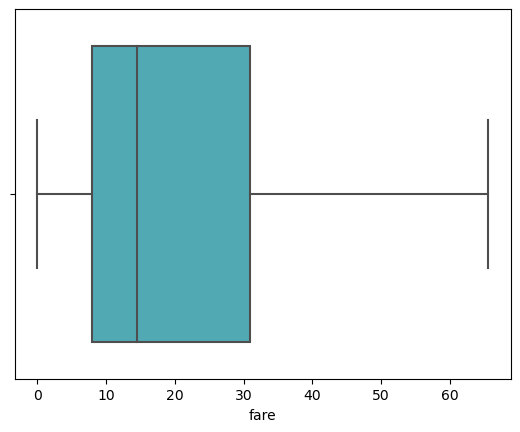

In [25]:
# Checking whether outliers have been handled with the help of boxplot
sns.boxplot(x = 'fare', data = df, palette = 'YlGnBu')

## Checking for Categorical Columns and Performing Encoding

In [26]:
cat_df = df.select_dtypes(include = ['object','bool'])
cat_df.columns

Index(['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [27]:
# Creating an instance of Label Encoder
le = LabelEncoder()

In [28]:
# Encoding categorical values using Label Encoder
df.sex = le.fit_transform(df.sex)
df.embarked = le.fit_transform(df.embarked)
df['class'] = le.fit_transform(df['class'])
df.who = le.fit_transform(df.who)
df.adult_male = le.fit_transform(df.adult_male)
df.deck = le.fit_transform(df.deck)
df.embark_town = le.fit_transform(df.embark_town)
df.alive = le.fit_transform(df.alive)
df.alone = le.fit_transform(df.alone)

In [29]:
# Checking whether all the values have been encoded
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,2,2,0,0
1,1,1,0,38.0,1,0,65.6344,0,0,2,0,2,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,2,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,2,2,0,1


## Splitting the Dataset into Dependent and Independent Variables.

In [30]:
# y -> dependent variable(target), X -> independent variables(predictors)
y = df['survived']
X = df.drop(['survived'], axis = 1)

In [31]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [32]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,3,1,22.0,1,0,7.2500,2,2,1,1,2,2,0,0
1,1,0,38.0,1,0,65.6344,0,0,2,0,2,0,1,0
2,3,0,26.0,0,0,7.9250,2,2,2,0,2,2,1,1
3,1,0,35.0,1,0,53.1000,2,0,2,0,2,2,1,0
4,3,1,35.0,0,0,8.0500,2,2,1,1,2,2,0,1


## Scaling the Independent Variables

In [33]:
# Creating an instance of MinMax Scaler
scale = MinMaxScaler()

In [34]:
# Scaling the independent variables so that their values lie in the range [0,1]
X_scaled = scale.fit_transform(X)

In [35]:
# Replacing the orginal values with the scaled values
X = pd.DataFrame(X_scaled, columns = X.columns)

In [36]:
# Checking whether the values have been successfully scaled
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1.0,1.0,0.271174,0.125,0.0,0.110460,1.0,1.0,0.5,1.0,0.333333,1.0,0.0,0.0
1,0.0,0.0,0.472229,0.125,0.0,1.000000,0.0,0.0,1.0,0.0,0.333333,0.0,1.0,0.0
2,1.0,0.0,0.321438,0.000,0.0,0.120745,1.0,1.0,1.0,0.0,0.333333,1.0,1.0,1.0
3,0.0,0.0,0.434531,0.125,0.0,0.809027,1.0,0.0,1.0,0.0,0.333333,1.0,1.0,0.0
4,1.0,1.0,0.434531,0.000,0.0,0.122649,1.0,1.0,0.5,1.0,0.333333,1.0,0.0,1.0


## Splitting the Dataset into Training and Testing Set

In [37]:
# Splitting the dataset in a 75:25 train-test split ratio (i.e. 75% records will belong to training set and rest 25% to the testing set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [38]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
298,0.0,1.0,0.367921,0.000,0.000000,0.464695,1.0,0.0,0.5,1.0,0.333333,1.0,1.0,1.0
884,1.0,1.0,0.308872,0.000,0.000000,0.107413,1.0,1.0,0.5,1.0,0.333333,1.0,0.0,1.0
247,0.5,0.0,0.296306,0.000,0.333333,0.220921,1.0,0.5,1.0,0.0,0.333333,1.0,1.0,0.0
478,1.0,1.0,0.271174,0.000,0.000000,0.114586,1.0,1.0,0.5,1.0,0.333333,1.0,0.0,1.0
305,0.0,1.0,0.006283,0.125,0.333333,1.000000,1.0,0.0,0.0,0.0,0.333333,1.0,1.0,0.0


In [39]:
X_train.shape

(668, 14)

In [40]:
X_test.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
709,1.0,1.0,0.367921,0.125,0.166667,0.232284,0.0,1.0,0.5,1.0,0.333333,0.0,1.0,0.0
439,0.5,1.0,0.384267,0.000,0.000000,0.159977,1.0,0.5,0.5,1.0,0.333333,1.0,0.0,1.0
840,1.0,1.0,0.246042,0.000,0.000000,0.120745,1.0,1.0,0.5,1.0,0.333333,1.0,0.0,1.0
720,0.5,0.0,0.070118,0.000,0.166667,0.502785,1.0,0.5,0.0,0.0,0.333333,1.0,1.0,0.0
39,1.0,0.0,0.170646,0.125,0.000000,0.171278,0.0,1.0,0.0,0.0,0.333333,0.0,1.0,0.0


In [41]:
X_test.shape

(223, 14)

In [42]:
y_train.head()

298    1
884    0
247    1
478    0
305    1
Name: survived, dtype: int64

In [43]:
y_train.shape

(668,)

In [44]:
y_test.head()

709    1
439    0
840    0
720    1
39     1
Name: survived, dtype: int64

In [45]:
y_test.shape

(223,)